# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.146499e+01     6.704870e+00
 * time: 0.004565000534057617
     1     2.863173e+01     5.281292e+00
 * time: 0.013399124145507812
     2     2.159078e+01     5.840321e+00
 * time: 0.035178184509277344
     3     1.384483e+01     1.882847e+00
 * time: 0.06045818328857422
     4     1.327118e+01     3.109467e+00
 * time: 0.07724618911743164
     5     1.240335e+01     1.529811e+00
 * time: 0.09447002410888672
     6     1.103714e+01     1.787184e+00
 * time: 0.11079716682434082
     7     1.040858e+01     1.390525e+00
 * time: 0.1268320083618164
     8     9.868072e+00     8.204869e-01
 * time: 0.1421520709991455
     9     9.854139e+00     1.862140e+00
 * time: 0.15360307693481445
    10     9.716007e+00     1.078215e+00
 * time: 0.16951704025268555
    11     9.548496e+00     1.132982e+00
 * time: 0.18578219413757324
    12     9.518770e+00     1.170037e+00
 * time: 0.19752812385559082
    13     9.375381e+00     8.354686e-01
 * time

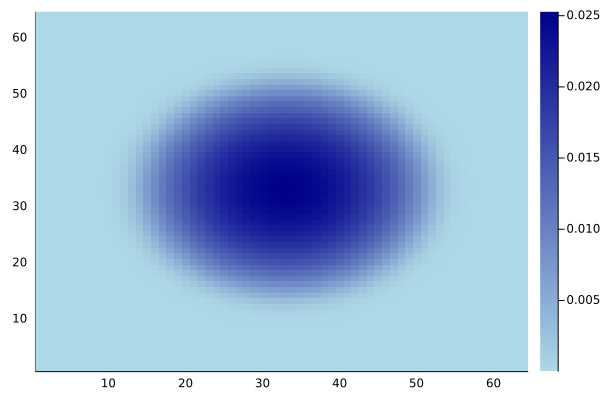

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)